In [1]:
from comparisons import readData, doPlot
from netCDF4 import Dataset

Maximum absolute bias:0.0000
Minimum absolute bias:0.0000


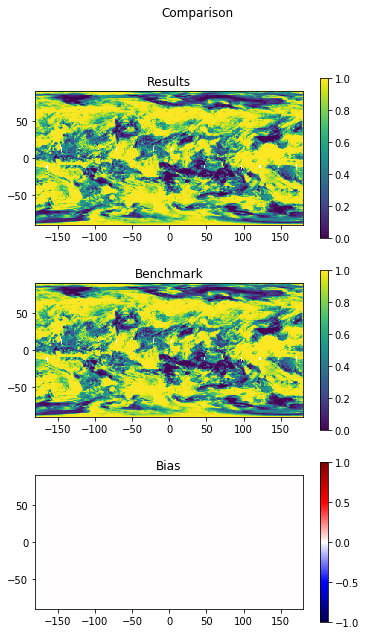

In [2]:
#Single day benchmark results
bmDay_resu="/umbc/xfs1/jianwu/users/charaj1/CMAC/MODIS-Aggregation/output-data/benchmark/MODAgg_3var_parMonth/"
CF_BMK,_,_=readData(bmDay_resu+"MODAgg_3var_parMonth_20080101.hdf5")#Benchmakr
CF_Res,_,_=readData(bmDay_resu+"MODAgg_3var_parMonth_20080101.hdf5")#Results for the comparison
fig1,fig1_ttl=doPlot(CF_BMK,CF_Res,'Comparison')

In [3]:
#Redwan's results (He does not use save_hdf() to save output files.)
rwDay_resu="/umbc/xfs1/jianwu/users/rwalid1/individual/work/Cybtrn-team3/Jan_CF_XR_L2L3_Jun19_n4_run1_1day.nc"
f = Dataset(rwDay_resu, "r")
CF_Res=f.variables['__xarray_dataarray_variable__'][:]
f.close()

Maximum absolute bias:0.9383
Minimum absolute bias:0.0000


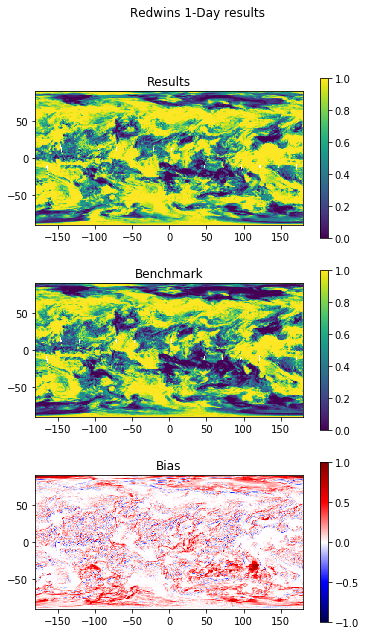

In [4]:
fig1,fig1_ttl=doPlot(CF_BMK,CF_Res,'Redwins 1-Day results')